<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-8/Session-8/Assignment-8/EVA_4_S8_Praveen_Raghuvanshi_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test

### 1. Mount google drive

In [2]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-8')

In [4]:
cd '/content/drive/My Drive/eva-4/assignment-8'

/content/drive/My Drive/eva-4/assignment-8


In [5]:
ls

checkpoint/  data/  model.py  __pycache__/  S8_functions.py  utils.py


### 3. Import all modules and libraries

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

### 4. Set Device

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from S8_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test
from model import Net, ResNet, resnet18

###  6. Load Transformations

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [10]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [11]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 ship  deer plane horse


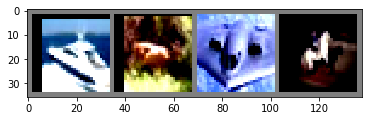

In [12]:
display(4, trainloader, classes)

### 10. Load Resnet18 Model


In [13]:
print("Building Model")
net = resnet18()

Building Model


In [14]:
# Display Model Summary
!pip install torchsummary
from torchsummary import summary

model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### 11. Define loss function and optimizer


In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 12. Run Train and Test

In [17]:
for epoch in range(30):
    train(net, trainloader, device, optimizer, criterion, epoch)
    test(net, testloader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 52ms | Tot: 10m48s | Train >> Loss: 1.573 | Acc: 43.288% (21644/50000) 12500/12500 
 [================================================================>]  Step: 21ms | Tot: 59s966ms | Test >> Loss: 1.146 | Acc: 60.500% (6050/10000) 2500/2500 

Epoch: 1
 [================================================================>]  Step: 50ms | Tot: 10m43s | Train >> Loss: 1.003 | Acc: 64.644% (32322/50000) 12500/12500 
 [================================================================>]  Step: 27ms | Tot: 1m744ms | Test >> Loss: 0.791 | Acc: 72.120% (7212/10000) 2500/2500 

Epoch: 2
 [================================================================>]  Step: 48ms | Tot: 10m43s | Train >> Loss: 0.780 | Acc: 72.986% (36493/50000) 12500/12500 
 [================================================================>]  Step: 23ms | Tot: 58s701ms | Test >> Loss: 0.689 | Acc: 76.170% (7617/10000) 2500/2500 

Epoch: 3
 [=====

### 13. Analysis
- No of Epochs : 30
- Best Train Acc: 95.856%
- Best Test  Acc: 91.110%
- No Model changes in Resnet18
- Extra things done
  - Normalization: 
    - transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
  - Image augmentation
    - Train
      - RandomCrop
      - RandomHorizontalFlip
    - Test
      - Nothing
- Overfitting 
  - Calculation: (100 - 91.110) + 95.856 = 104.746 --> No overfitting
  - Difference : 95.856 - 91.110 = 4.746 --> Less -> No overfitting
- Train and test acc were converging till epoch 7 and started to diverge post that.
- There has been a continous increase in train accuracy
- Test accuracy is fluctuating
- Gap between train and test acc is 4.7 in last epoch which is reasonable
- The model has capacity to be trained further but accuracy gains won't be too much.